In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_path = './data/players_20.csv'
df = pd.read_csv(data_path)
df.fillna(0, inplace = True)
df = df.drop(['player_url','dob','real_face','player_tags','long_name','sofifa_id','skill_moves'], axis = 1)
for col in df.columns:
    print(col)

short_name
age
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
work_rate
body_type
release_clause_eur
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking
defending_standing_tackle
defending_sliding_tackle
goal

In [27]:
#CLUB VALUES

In [5]:
#getting the 20 top valued clubs

clubs = df['club'].unique()
club_names = []
club_values = np.zeros((clubs.shape[0],1))

for i, club in enumerate(clubs):
    rows_with_club = df.loc[df['club'] == club]
    
    #club value as sum of market values of players
    mkt_values = rows_with_club['value_eur']
    club_names.append(club)
    
    club_values[i] = pd.Series.sum(mkt_values)

In [6]:
# print(club_values)
sort_val_idxs = np.argsort(club_values, axis = 0)
sort_val_idxs = np.flip(np.squeeze(sort_val_idxs))

club_values = club_values[sort_val_idxs]
club_names[:] = [club_names[i] for i in sort_val_idxs] 

# for i in range(len(club_names)):
#     print(club_names[i],club_values[i])

[897850000.0, 869300000.0, 845745000.0, 735475000.0, 693265000.0, 688775000.0, 687550000.0, 649850000.0, 590375000.0, 532325000.0, 518275000.0, 504970000.0, 501675000.0, 454860000.0, 448610000.0, 406355000.0, 384745000.0, 384060000.0, 382760000.0, 359400000.0]


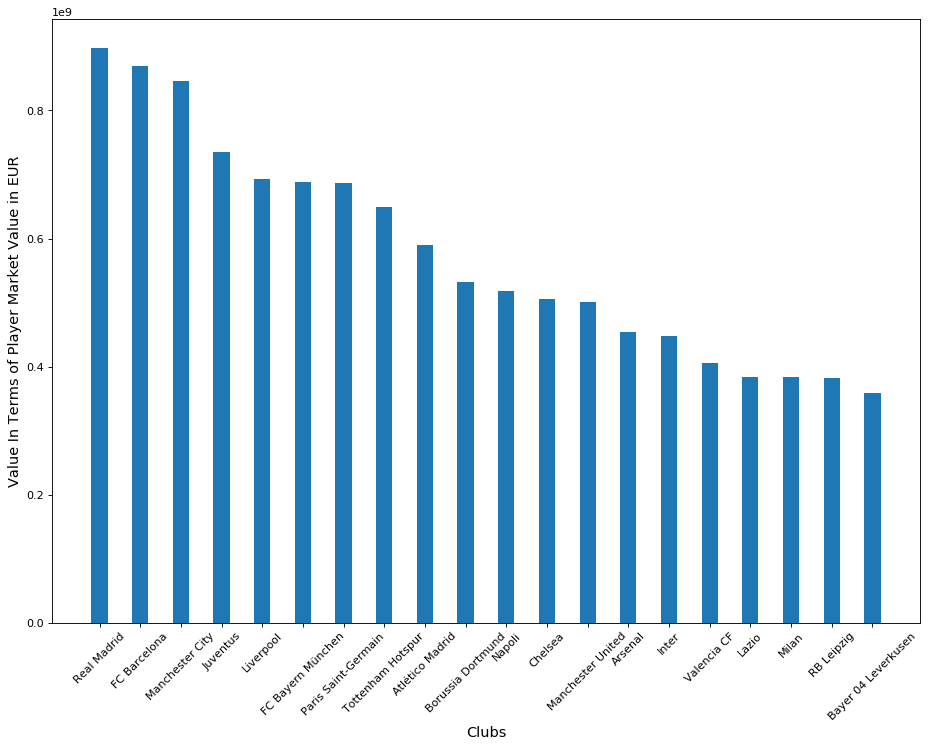

In [113]:
top_50_club_val = club_values[:20,0]
top_50_club_val_names = club_names[:20]

#generate plot
print(list(top_50_club_val))
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Clubs', fontsize = 13)
plt.ylabel('Value In Terms of Player Market Value in EUR',fontsize = 13)
plt.bar(range(20),height = list(top_50_club_val),width= 0.4,align='center')
plt.xticks(range(20), top_50_club_val_names, rotation = 45)
# plt.set_xticklabels(top_50_club_val_names, rotation=45 )
plt.savefig('foo.png', bbox_inches='tight')

In [8]:
#TODO : CLUB VALUES WITH PLAYER VALUES STACKED ON TOP OF EACH OTHER

In [9]:
df['club'].value_counts()['Chelsea']

33

In [7]:
#market value per position

positions = df['team_position'].unique()
print(positions)

print(len(df))
dfposmval = df[df['team_position'] != 0]
dfposmval = dfposmval[dfposmval['team_position'] != 'RES']
dfposmval = dfposmval[dfposmval['team_position'] != 'SUB']
print(len(dfposmval))

positions = dfposmval['team_position'].unique()
print(positions)




# wingback
# cb
# mid
# gk
# forward

['RW' 'LW' 'CAM' 'GK' 'RCM' 'LCB' 'ST' 'CDM' 'LDM' 'RM' 'RCB' 'LCM' 'LM'
 'CF' 'SUB' 'LB' 'LS' 'RB' 'RDM' 'RES' 'RAM' 'RS' 'RF' 'CM' 'CB' 'LF'
 'LAM' 0 'RWB' 'LWB']
18278
7260
['RW' 'LW' 'CAM' 'GK' 'RCM' 'LCB' 'ST' 'CDM' 'LDM' 'RM' 'RCB' 'LCM' 'LM'
 'CF' 'LB' 'LS' 'RB' 'RDM' 'RAM' 'RS' 'RF' 'CM' 'CB' 'LF' 'LAM' 'RWB'
 'LWB']


In [8]:
# team_position


# 'RW' 'LW' 'RS' 'RF' 'CF' 'ST' 'LF'  : FORWARD
# 'CDM' 'LDM' 'RDM' 'LCM' 'CM' 'RCM': DEFENSIVE MID
# 'RAM' 'RM' 'LM' 'CAM' 'LAM' : ATTACKING MID
# 'RWB' 'LWB' 'LB' 'RB' : WING BACK
# 'CB' 'LCB' 'RCB' : CENTRE BACK
# 'GK' : GOALKEEPER

#confidence interval statsmodel regression to give importance per feature

clf_features = ['pace',
'shooting',
'passing',
'dribbling',
'defending',
'physic',
'gk_diving',
'gk_handling',
'gk_kicking',
'gk_reflexes',
'gk_speed',
'gk_positioning',
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'goalkeeping_diving',
'goalkeeping_handling',
'goalkeeping_kicking',
'goalkeeping_positioning'
,'goalkeeping_reflexes'
,'weak_foot']

targets = ['player_positions']

df_clf = df[clf_features]
df_clf.head()

df_targets = df[targets]
df_targets.head()

y_categ = []

genzn = dict()
genzn['WG'] = ['RW', 'LW','RM', 'LM']
genzn['FW'] = ['LS', 'RS', 'RF', 'CF', 'ST', 'LF']
genzn['WB'] = ['RWB', 'LWB', 'LB', 'RB']
genzn['CB'] = ['CB', 'LCB', 'RCB']
genzn['GK'] = ['GK']
genzn['AM'] = ['RAM', 'CAM', 'LAM']
genzn['DM'] = ['CDM', 'LDM', 'RDM', 'LCM', 'CM', 'RCM']

idx = dict()
idx['FW'] = 0
idx['WB'] = 1
idx['CB'] = 2
idx['GK'] = 3
idx['AM'] = 4
idx['DM'] = 5
idx['WG'] = 6
for i in range(len(df_targets)):
     for k, v in genzn.items():
        if df_targets['player_positions'][i].split(',')[0] in v:
            y_categ.append(idx[k]) 

print(len(y_categ))

y_one_hot = np.zeros((len(y_categ),len(idx)))
for i in range(len(y_categ)):
    y_one_hot[i,y_categ[i]] = 1


# print(y_one_hot[:10])

18278


In [9]:
X_train = df_clf.values
print(X_train[0])


[87. 92. 92. 96. 39. 66.  0.  0.  0.  0.  0.  0. 88. 95. 70. 92. 88. 97.
 93. 94. 92. 96. 91. 84. 93. 95. 95. 86. 68. 75. 68. 94. 48. 40. 94. 94.
 75. 96. 33. 37. 26.  6. 11. 15. 14.  8.  4.]


In [11]:
def normalize(X):
    # 0 mean
    X_mean = np.sum(X, axis = 0) / X.shape[0]
    X_sub_mean = X - X_mean
    
    X_range = np.max(X, axis = 0) - np.min(X, axis = 0)
    
    return X_sub_mean / X_range

    # unit sd
    

In [32]:
X_train_norm = normalize(X_train)
#features normalized

In [33]:
X_train_norm.shape
y_categ = np.array(y_categ)
print(y_categ.shape)
np.max(y_categ)

(18278,)


6

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
log_reg = LogisticRegression(max_iter = 10000, C=40)

log_reg.fit(X_train_norm, y_categ)


LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
print(X_train_norm[0].shape)
log_reg.predict(X_train_norm[:5])

log_reg.score(X_train_norm, y_categ)

(47,)


0.8645366013787067

In [149]:
print(log_reg.decision_function(X_train_norm[:2]))

[[ 12.09028622  -9.72913129 -19.9114985  -12.24339264  13.00525978
    4.72050109  12.06797535]
 [ 16.51770968 -10.06875859 -17.34490941 -11.81277445   9.89480262
    0.16789729  12.64603286]]


(7, 47)


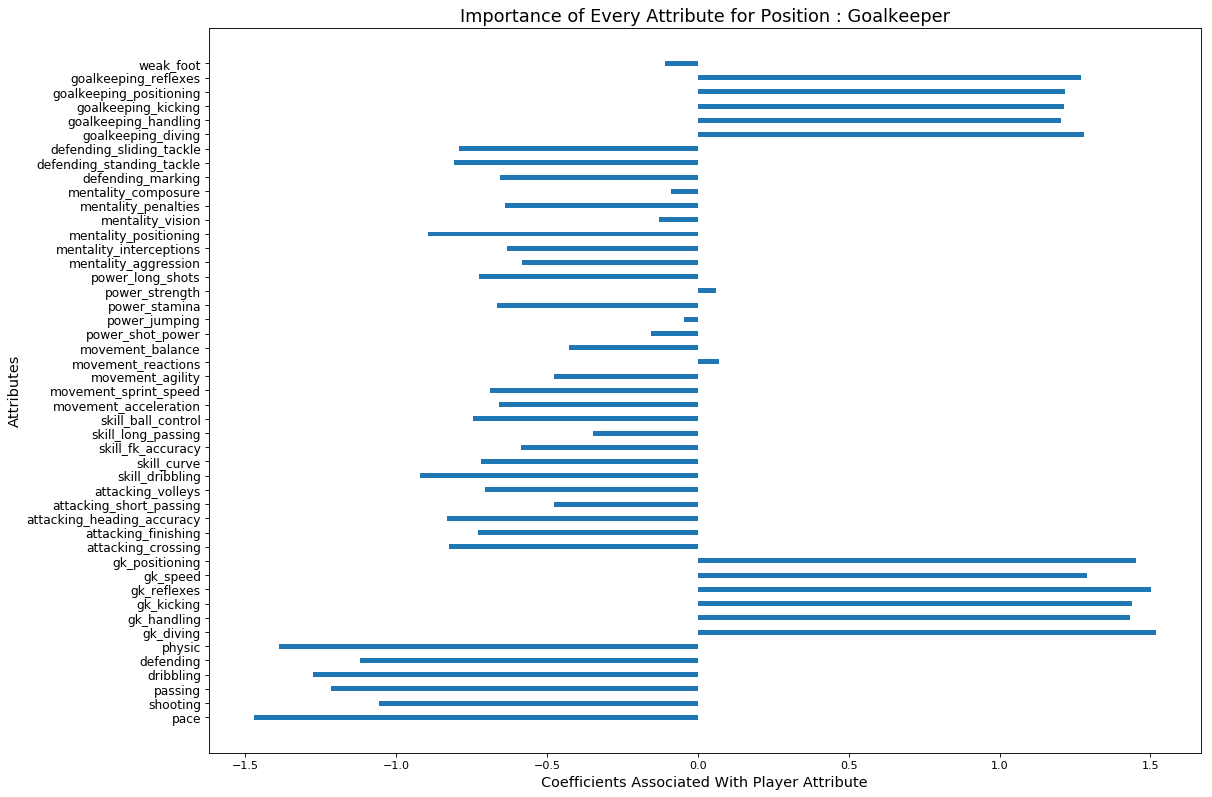

In [236]:
print(np.shape(log_reg.coef_))

#generate plot
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Coefficients Associated With Player Attribute', fontsize = 13)
plt.ylabel('Attributes',fontsize = 13)
plt.title('Importance of Every Attribute for Position : Goalkeeper',fontsize = 16)

# plt.bar(range(47),height = list(np.abs(log_reg.coef_[1,:])),width= 0.2,align='center')
# plt.xticks(range(47), clf_features, rotation = 90)

plt.barh(range(47),width = list(log_reg.coef_[idx['GK'],:]),height= 0.35,align='center')
plt.yticks(range(47), clf_features, rotation = 0, fontsize = 11)

# plt.set_xticklabels(top_50_club_val_names, rotation=45 )
plt.savefig('generated_plots/gk_weights.png', bbox_inches='tight')

In [15]:
#regression on attributes vs overall rating
from sklearn.linear_model import LinearRegression

reg_features = clf_features.copy()

reg_features.append('age')

df_reg = df[reg_features]

X_train_reg = df_reg.values

X_train_norm = normalize(X_train_reg)

y_reg= df['overall'].values

lin_reg = LinearRegression()

lin_reg.fit(X_train_norm, y_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lin_reg.predict(X_train_norm[:4])

array([89.17359454, 90.72974367, 86.0441657 , 88.734083  ])

In [210]:
print(lin_reg.coef_)

[-5.06212795e+00 -2.39811607e-01  1.21142360e+01  2.58780058e+01
  1.31991661e+01  1.23979259e+01  1.27729795e+01  1.33322936e+01
  8.34237535e-01  1.38451969e+01 -8.04201463e+00  1.31162439e+01
 -1.65890534e+00  3.13166327e+00  6.95261747e+00  5.26990228e+00
  5.40720431e-01 -1.09070384e+01 -5.19510524e-01  1.50644954e-02
 -3.02750431e+00  7.51024906e+00  5.94326496e+00  5.24900302e+00
 -2.66490173e+00  1.91388186e+01 -1.64489187e+00  2.05543166e+00
 -3.52728772e-01 -1.53693092e+00 -1.62333655e+00 -2.46185188e+00
 -2.50384096e+00 -3.26464331e+00 -5.68253863e+00 -3.73921628e+00
  5.69879385e-01  8.70214161e+00 -8.45063339e-01 -1.71835796e+00
 -2.58471810e+00  8.31437380e-01  7.53724863e-01  5.25939334e-01
  5.44492755e-01 -1.78752807e-01  3.23137516e-01  1.50722683e+00]


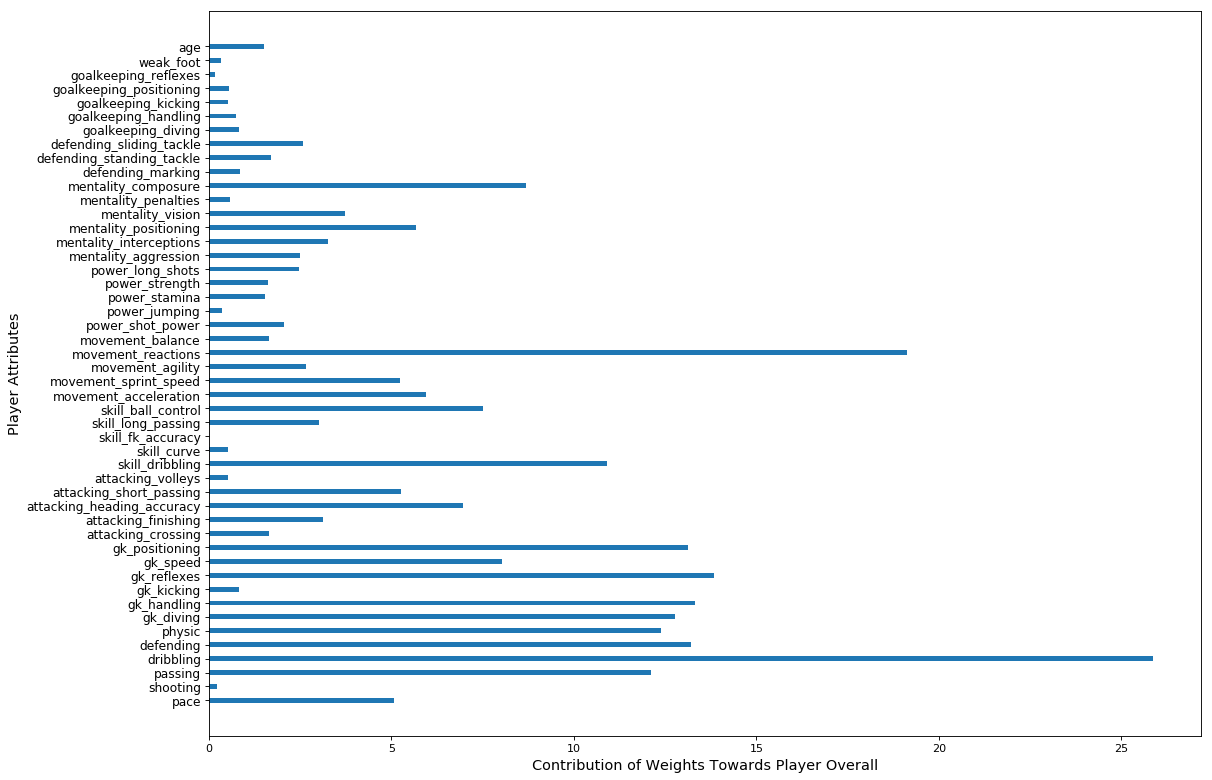

In [17]:
#generate plot
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('Player Attributes', fontsize = 13)
plt.xlabel('Contribution of Weights Towards Player Overall',fontsize = 13)
# plt.bar(range(47),height = list(np.abs(log_reg.coef_[1,:])),width= 0.2,align='center')
# plt.xticks(range(47), clf_features, rotation = 90)

plt.barh(range(lin_reg.coef_.shape[0]),width = list(np.abs(lin_reg.coef_)),height= 0.35,align='center')
plt.yticks(range(lin_reg.coef_.shape[0]), reg_features, rotation = 0, fontsize = 11)

# plt.set_xticklabels(top_50_club_val_names, rotation=45 )
plt.savefig('generated_plots/ovr_weights.png', bbox_inches='tight')

In [214]:
#MARKET VALUE

from sklearn.linear_model import LinearRegression

y_reg= df['value_eur'].values

lin_reg = LinearRegression()

lin_reg.fit(X_train_norm, y_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
lin_reg.predict(X_train_norm[:4])

array([16205046.26018206, 15305303.26654829, 15591934.15881874,
       17307052.05636238])

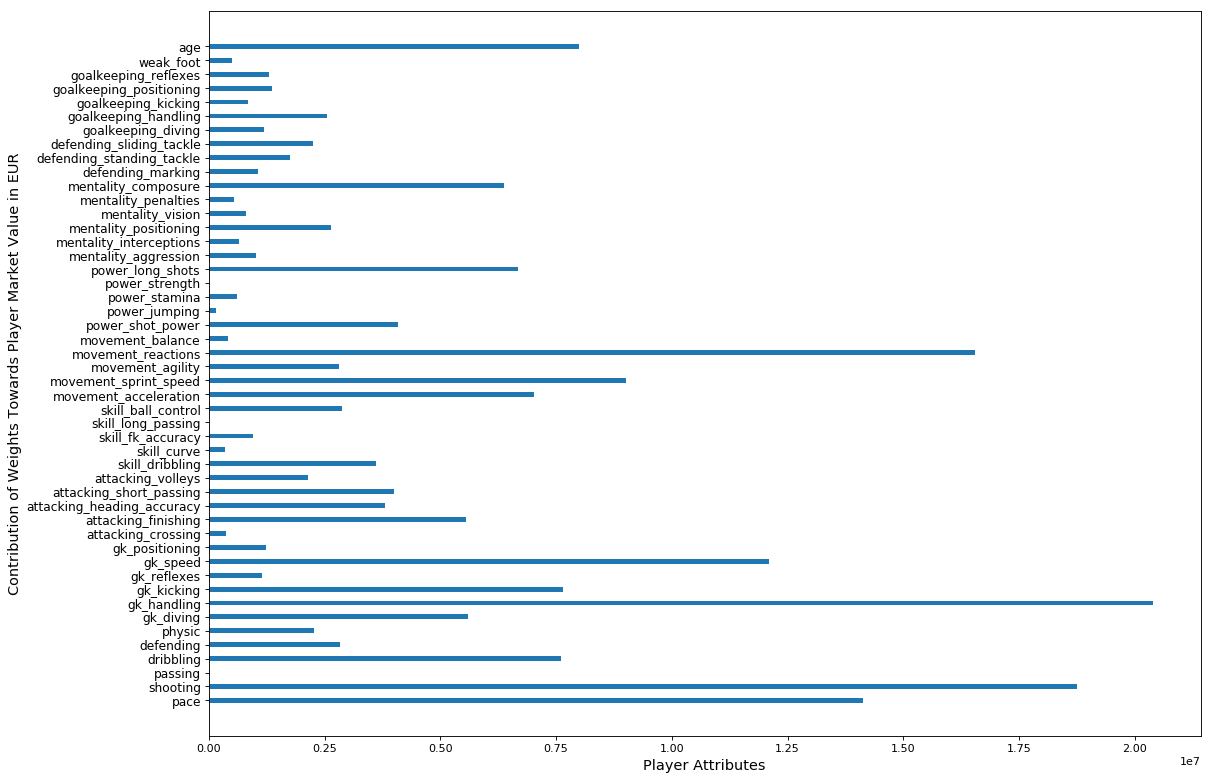

In [217]:
#generate plot
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('Player Attributes', fontsize = 13)
plt.title('Contribution of Attributes Towards Player Market Value in EUR',fontsize = 13)
plt.xlabel('Contribution of Weights Towards Player Market Value in EUR',fontsize = 13)

# plt.bar(range(47),height = list(np.abs(log_reg.coef_[1,:])),width= 0.2,align='center')
# plt.xticks(range(47), clf_features, rotation = 90)

plt.barh(range(lin_reg.coef_.shape[0]),width = list(np.abs(lin_reg.coef_)),height= 0.35,align='center')
plt.yticks(range(lin_reg.coef_.shape[0]), reg_features, rotation = 0, fontsize = 11)

# plt.set_xticklabels(top_50_club_val_names, rotation=45 )
plt.savefig('generated_plots/mkt_value_weights.png', bbox_inches='tight')

In [48]:
#use clf features as X 
#use

countries = ['England',              
'Germany', 'Spain',
'France',
'Argentina', 'Brazil','Italy','Colombia','Japan'
'Netherlands',
'China PR',
'Chile',
'Sweden',
'Norway',
'Republic of Ireland',
'United States',
'Denmark',
'Portugal',
'Mexico',
'Poland',
'Korea Republic',
'Austria',
'Saudi Arabia'
'Turkey'
'Romania' 
'Scotland',
'Belgium',
'Switzerland','Australia','Uruguay']

a = df['nationality'].value_counts()[:30]

y = []

for i in range(len(df)):
    if df['nationality'][i] == 'England':#in countries:
        y.append(1)#countries.index(df['nationality'][i]))
    else :
        y.append(0)#len(countries))
print(y[:10])
    #considering only the top 30
    
y_countries = np.array(y)
print(y_countries.shape)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(18278,)


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_norm, y_countries)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[0.02233503 0.0191376  0.01931524 0.02009977 0.02008116 0.02201432
 0.00227033 0.00262229 0.00218452 0.00228916 0.00296251 0.00212521
 0.0250641  0.02403083 0.02605556 0.02804857 0.02523669 0.02584526
 0.02521609 0.02887183 0.02359477 0.02777642 0.02541241 0.02532182
 0.0271706  0.02791563 0.0285423  0.02535987 0.02811555 0.02833681
 0.02710627 0.02422975 0.02914488 0.0240793  0.0220672  0.02421815
 0.02900147 0.02602191 0.02243245 0.02355501 0.02354023 0.01976632
 0.02094245 0.02236769 0.01957573 0.02147754 0.0071214 ]


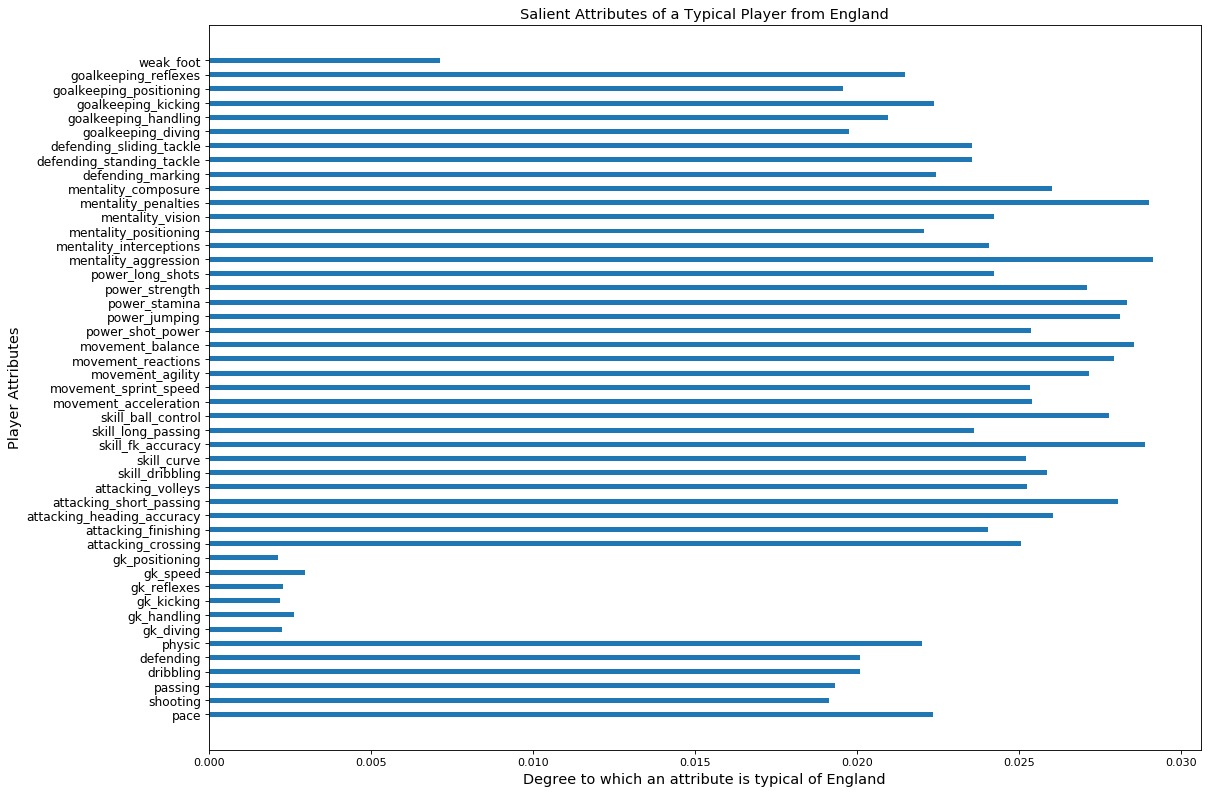

In [50]:
print(rf.feature_importances_)

#generate plot
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('Player Attributes', fontsize = 13)
plt.title('Salient Attributes of a Typical Player from England',fontsize = 13)
plt.xlabel('Degree to which an attribute is typical of England',fontsize = 13)

# plt.bar(range(47),height = list(np.abs(log_reg.coef_[1,:])),width= 0.2,align='center')
# plt.xticks(range(47), clf_features, rotation = 90)

plt.barh(range(rf.feature_importances_.shape[0]),width = list(np.abs(rf.feature_importances_)),height= 0.35,align='center')
plt.yticks(range(rf.feature_importances_.shape[0]), reg_features, rotation = 0, fontsize = 11)

# plt.set_xticklabels(top_50_club_val_names, rotation=45 )
plt.savefig('generated_plots/england_weights.png', bbox_inches='tight')